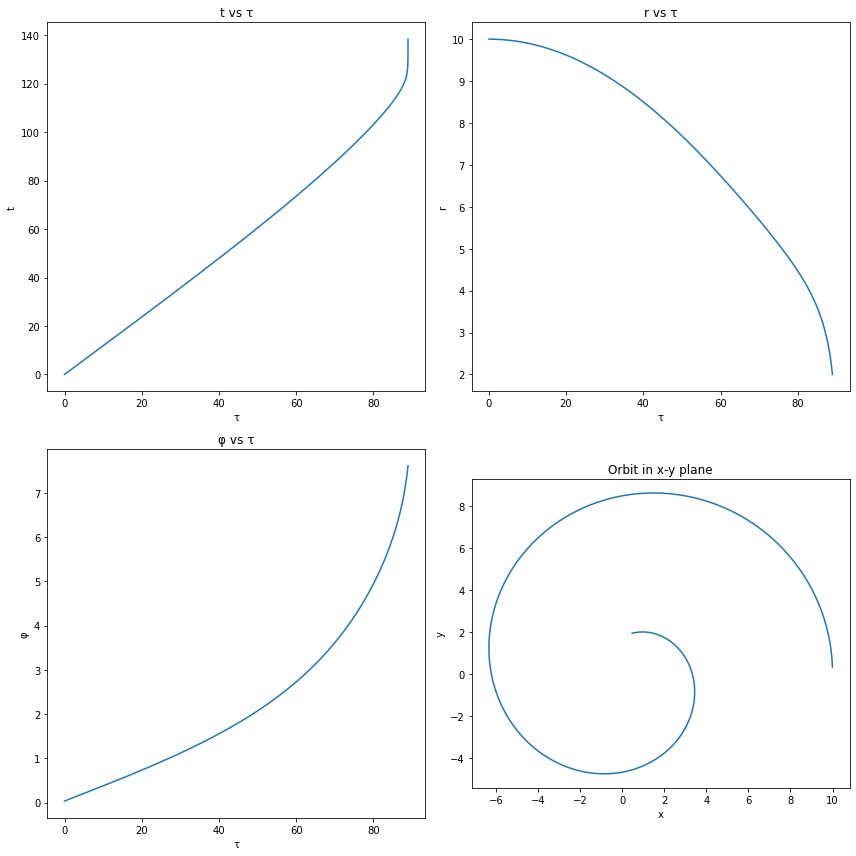

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

m = 1
R = 10
C = 0.9/(10*np.sqrt(7))
time_init = np.sqrt(R*(1+R**2*C**2)/(R-2*m))

def odes(tau, y):
    t, r, phi, v_t, v_r, v_phi = y
    
    dv_t_dtau = - (2 * m / r**2) * (1 - 2 * m / r)**(-1) * v_t * v_r
    dv_r_dtau = (m / r**2) * (1 - 2 * m / r)**(-1) * v_r**2 - (m / r**2) * (1 - 2 * m / r) * v_t**2 + r * (1 - 2 * m / r) * v_phi**2
    dv_phi_dtau = - (2 / r) * v_r * v_phi
    
    return [v_t, v_r, v_phi, dv_t_dtau, dv_r_dtau, dv_phi_dtau]

initial_conditions = [0, R, C, time_init, 0, C]

time_span = (0, 1000)
time_evaluations = np.linspace(*time_span, 1000000)

solution = solve_ivp(odes, time_span, initial_conditions, t_eval = time_evaluations, method = "RK45")

tau = solution.t
t = solution.y[0]
r = solution.y[1]
phi = solution.y[2]

x = r*np.cos(phi)
y = r*np.sin(phi)

# Plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].plot(tau, t)
axs[0, 0].set_xlabel('τ')
axs[0, 0].set_ylabel('t')
axs[0, 0].set_title('t vs τ')

axs[0, 1].plot(tau, r)
axs[0, 1].set_xlabel('τ')
axs[0, 1].set_ylabel('r')
axs[0, 1].set_title('r vs τ')

axs[1, 0].plot(tau, phi)
axs[1, 0].set_xlabel('τ')
axs[1, 0].set_ylabel('φ')
axs[1, 0].set_title('φ vs τ')

axs[1, 1].plot(x, y)
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')
axs[1, 1].set_title('Orbit in x-y plane')
axs[1, 1].set_aspect('equal')

plt.tight_layout()
plt.show()
